# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:30:55.099743: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:30:55.127454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:30:55.563808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "CONCURRENCE"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:30:56.570294: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:30:56.593787: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395457.208819  209748 service.cc:145] XLA service 0x74f24c004860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395457.208840  209748 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:30:57.221045: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:30:57.294346: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:53 1s/step - accuracy: 0.4062 - loss: 0.6979

109/150 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.6675 - loss: 0.6212

I0000 00:00:1716395457.898558  209748 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6761 - loss: 0.6076 - val_accuracy: 0.8458 - val_loss: 0.4045


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.3032

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8920 - loss: 0.3086

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.8957 - loss: 0.3004 - val_accuracy: 0.9542 - val_loss: 0.1557


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0922

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9676 - loss: 0.1254

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9675 - loss: 0.1248 - val_accuracy: 0.9692 - val_loss: 0.1118


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1068

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9721 - loss: 0.0905

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9726 - loss: 0.0911 - val_accuracy: 0.9750 - val_loss: 0.1013


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2515

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9717 - loss: 0.0989

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9724 - loss: 0.0975 - val_accuracy: 0.9792 - val_loss: 0.0950


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0377

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9850 - loss: 0.0640

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9844 - loss: 0.0666 - val_accuracy: 0.9808 - val_loss: 0.0898


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0680

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9812 - loss: 0.0710

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9814 - loss: 0.0719 - val_accuracy: 0.9808 - val_loss: 0.0916


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0256

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.9839 - loss: 0.0642

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9838 - loss: 0.0659 - val_accuracy: 0.9817 - val_loss: 0.0853


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.0766

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9839 - loss: 0.0574

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9840 - loss: 0.0592 - val_accuracy: 0.9833 - val_loss: 0.0853


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0401

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9844 - loss: 0.0695

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9846 - loss: 0.0689 - val_accuracy: 0.9842 - val_loss: 0.0823


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0360

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9864 - loss: 0.0685

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9864 - loss: 0.0678 - val_accuracy: 0.9867 - val_loss: 0.0796


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.2759

115/150 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.9844 - loss: 0.0697

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9849 - loss: 0.0673 - val_accuracy: 0.9850 - val_loss: 0.0769


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0557

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9889 - loss: 0.0489

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9887 - loss: 0.0499 - val_accuracy: 0.9892 - val_loss: 0.0765


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0575

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9876 - loss: 0.0521

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9876 - loss: 0.0524 - val_accuracy: 0.9883 - val_loss: 0.0724


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0091

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9894 - loss: 0.0465

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9892 - loss: 0.0478 - val_accuracy: 0.9892 - val_loss: 0.0697


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0341

111/150 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.9882 - loss: 0.0643

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9887 - loss: 0.0604 - val_accuracy: 0.9875 - val_loss: 0.0734


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.2411

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9885 - loss: 0.0559

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9888 - loss: 0.0534 - val_accuracy: 0.9892 - val_loss: 0.0657


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0082

112/150 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9900 - loss: 0.0474

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9902 - loss: 0.0461 - val_accuracy: 0.9900 - val_loss: 0.0622


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0517

114/150 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9895 - loss: 0.0461

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9902 - loss: 0.0437 - val_accuracy: 0.9917 - val_loss: 0.0644


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.3459

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9909 - loss: 0.0548

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9911 - loss: 0.0511 - val_accuracy: 0.9942 - val_loss: 0.0621


2024/05/22 18:31:00 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0133

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.9934 - loss: 0.0560


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/22 18:31:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 3


Model saved in run ca3bba206f034709bdaf192d22377b8d


Created version '3' of model 'QuantumStateClassifier-CONCURRENCE'.


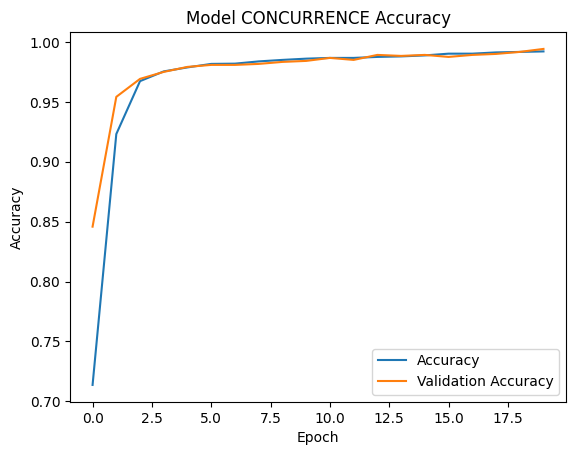

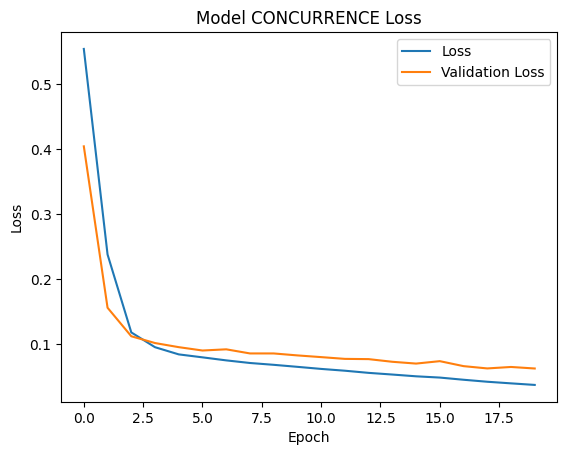

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:25 576ms/step - accuracy: 0.4062 - loss: 0.7060

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6608 - loss: 0.6225  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6714 - loss: 0.6078 - val_accuracy: 0.8600 - val_loss: 0.3611


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9062 - loss: 0.2688

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9001 - loss: 0.2875

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9025 - loss: 0.2812 - val_accuracy: 0.9567 - val_loss: 0.1292


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1327

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9609 - loss: 0.1187

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9617 - loss: 0.1168 - val_accuracy: 0.9775 - val_loss: 0.0747


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0455

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9784 - loss: 0.0720

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9784 - loss: 0.0717 - val_accuracy: 0.9875 - val_loss: 0.0527


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0362

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9827 - loss: 0.0577

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9830 - loss: 0.0564 - val_accuracy: 0.9883 - val_loss: 0.0382


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0124

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9877 - loss: 0.0359

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9877 - loss: 0.0362 - val_accuracy: 0.9908 - val_loss: 0.0282


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0123

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9908 - loss: 0.0314

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9908 - loss: 0.0314 - val_accuracy: 0.9958 - val_loss: 0.0240


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0368

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9915 - loss: 0.0276

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9942 - val_loss: 0.0197


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0068

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9943 - loss: 0.0182

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9967 - val_loss: 0.0192


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9688 - loss: 0.0526

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9929 - loss: 0.0217

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9967 - val_loss: 0.0136


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0066

114/150 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9963 - loss: 0.0138

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9961 - loss: 0.0140 - val_accuracy: 0.9958 - val_loss: 0.0135


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0048

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9957 - loss: 0.0155

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9960 - loss: 0.0152 - val_accuracy: 0.9975 - val_loss: 0.0135


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0047

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9974 - loss: 0.0124

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9974 - loss: 0.0122 - val_accuracy: 0.9983 - val_loss: 0.0101


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0052

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.9972 - loss: 0.0118

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9972 - loss: 0.0116 - val_accuracy: 0.9975 - val_loss: 0.0134


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0070

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9970 - loss: 0.0099

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9967 - val_loss: 0.0097


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0252

109/150 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.9973 - loss: 0.0074

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9975 - loss: 0.0072 - val_accuracy: 0.9992 - val_loss: 0.0097


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0398

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9978 - loss: 0.0085

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.9967 - val_loss: 0.0074


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0012

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9986 - loss: 0.0044

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9983 - val_loss: 0.0060


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0026

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9988 - loss: 0.0042

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9967 - val_loss: 0.0083


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0046

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9983 - loss: 0.0038

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9983 - loss: 0.0038 - val_accuracy: 0.9983 - val_loss: 0.0076


2024/05/22 18:31:05 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0015

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9991 - loss: 0.0060


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/22 18:31:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 3


Model saved in run 385e2ab68ada4f55bd1e3cbb4f4bcf18


Created version '3' of model 'QuantumStateClassifier-ENTROPY'.


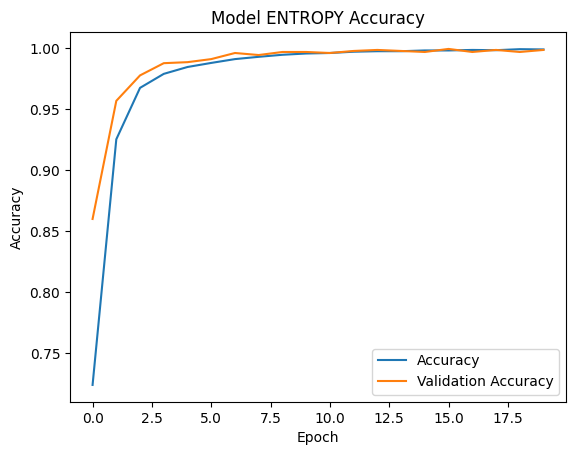

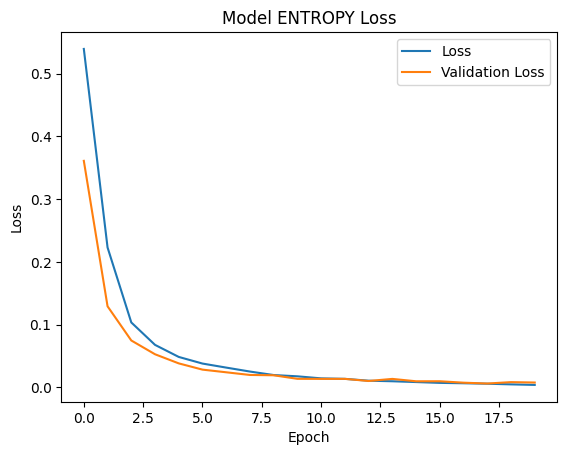

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:26 581ms/step - accuracy: 0.4062 - loss: 0.7063

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.6700 - loss: 0.6109  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6738 - loss: 0.6061 - val_accuracy: 0.8758 - val_loss: 0.3710


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.3117

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9136 - loss: 0.2890

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9170 - loss: 0.2768 - val_accuracy: 0.9633 - val_loss: 0.1275


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1096

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9662 - loss: 0.1088

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9668 - loss: 0.1071 - val_accuracy: 0.9708 - val_loss: 0.0731


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0513

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9799 - loss: 0.0657

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9803 - loss: 0.0648 - val_accuracy: 0.9817 - val_loss: 0.0500


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0196

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9871 - loss: 0.0460

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9870 - loss: 0.0460 - val_accuracy: 0.9858 - val_loss: 0.0387


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0194

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9913 - loss: 0.0342

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9910 - loss: 0.0346 - val_accuracy: 0.9925 - val_loss: 0.0290


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0107

109/150 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.9958 - loss: 0.0217

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9946 - loss: 0.0236 - val_accuracy: 0.9942 - val_loss: 0.0234


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0489

104/150 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9938 - loss: 0.0191

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9933 - val_loss: 0.0205


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0274

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9934 - loss: 0.0239

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9936 - loss: 0.0231 - val_accuracy: 0.9958 - val_loss: 0.0212


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0091

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9955 - loss: 0.0164

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9954 - loss: 0.0167 - val_accuracy: 0.9958 - val_loss: 0.0141


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0052

113/150 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9947 - loss: 0.0176

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9942 - val_loss: 0.0148


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0949

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9954 - loss: 0.0158

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9956 - loss: 0.0153 - val_accuracy: 0.9958 - val_loss: 0.0096


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0021

109/150 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9955 - loss: 0.0137

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9967 - val_loss: 0.0105


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0041

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9972 - loss: 0.0090

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.9967 - val_loss: 0.0084


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0021

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9976 - loss: 0.0076

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9958 - val_loss: 0.0083


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0028

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9965 - loss: 0.0101

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9967 - val_loss: 0.0063


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 9.8176e-04

105/150 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.9968 - loss: 0.0074   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9970 - loss: 0.0074 - val_accuracy: 0.9967 - val_loss: 0.0068


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0011

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9973 - loss: 0.0088

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9975 - loss: 0.0085 - val_accuracy: 0.9992 - val_loss: 0.0052


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0028

102/150 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.9987 - loss: 0.0041

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9986 - loss: 0.0046 - val_accuracy: 0.9975 - val_loss: 0.0046


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0010

115/150 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9997 - loss: 0.0023

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9992 - val_loss: 0.0041


2024/05/22 18:31:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


2024/05/22 18:31:11 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpj_p1f2ji/model, flavor: tensorflow). Fall back to return ['tensorflow==2.16.1', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0018

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9998 - loss: 0.0047


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/22 18:31:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 3


Model saved in run cd6567756bb143a8b7d30e5224b292f4


Created version '3' of model 'QuantumStateClassifier-NEGATIVITY'.


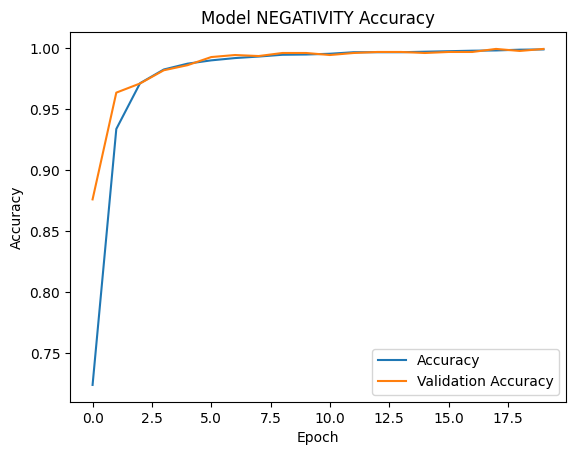

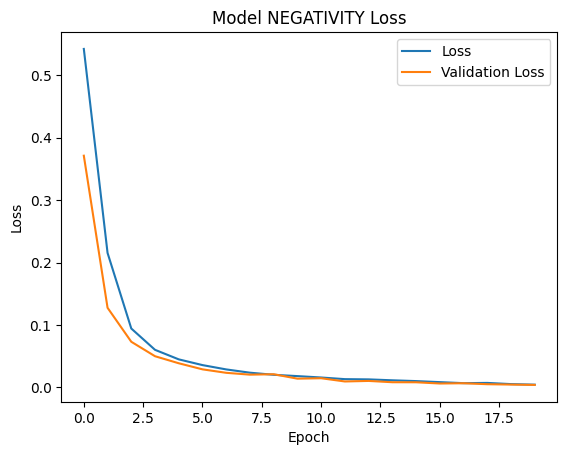

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:30 605ms/step - accuracy: 0.3750 - loss: 0.6973

113/150 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7259 - loss: 0.5987  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7294 - loss: 0.5857 - val_accuracy: 0.7492 - val_loss: 0.4741


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8438 - loss: 0.3917

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7817 - loss: 0.4268

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7885 - loss: 0.4220 - val_accuracy: 0.8417 - val_loss: 0.3592


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8438 - loss: 0.3381

141/150 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8654 - loss: 0.3246

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8659 - loss: 0.3238 - val_accuracy: 0.8708 - val_loss: 0.2913


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2432

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8954 - loss: 0.2668

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8963 - loss: 0.2645 - val_accuracy: 0.9092 - val_loss: 0.2269


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.2338

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9174 - loss: 0.2120

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9194 - loss: 0.2090 - val_accuracy: 0.9342 - val_loss: 0.1814


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.1776

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9464 - loss: 0.1565

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9470 - loss: 0.1558 - val_accuracy: 0.9592 - val_loss: 0.1389


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.1011

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9645 - loss: 0.1227

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9644 - loss: 0.1226 - val_accuracy: 0.9550 - val_loss: 0.1238


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0285

110/150 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9770 - loss: 0.1016

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9766 - loss: 0.1017 - val_accuracy: 0.9725 - val_loss: 0.1019


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0821

106/150 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.9704 - loss: 0.0933

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.9711 - loss: 0.0921 - val_accuracy: 0.9683 - val_loss: 0.0924


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0500

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9793 - loss: 0.0776

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.9786 - loss: 0.0780 - val_accuracy: 0.9617 - val_loss: 0.0925


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.1778

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9803 - loss: 0.0732

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9804 - loss: 0.0729 - val_accuracy: 0.9858 - val_loss: 0.0720


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.1471

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9796 - loss: 0.0667

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9793 - loss: 0.0672 - val_accuracy: 0.9767 - val_loss: 0.0738


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0580

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9807 - loss: 0.0587

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9807 - loss: 0.0593 - val_accuracy: 0.9775 - val_loss: 0.0660


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0662

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9837 - loss: 0.0584

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9837 - loss: 0.0583 - val_accuracy: 0.9792 - val_loss: 0.0648


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0624

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9804 - loss: 0.0581

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9806 - loss: 0.0577 - val_accuracy: 0.9767 - val_loss: 0.0644


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0574

101/150 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9858 - loss: 0.0512

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9838 - loss: 0.0528 - val_accuracy: 0.9858 - val_loss: 0.0613


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0562

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9866 - loss: 0.0463

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9862 - loss: 0.0467 - val_accuracy: 0.9833 - val_loss: 0.0571


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0988

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9816 - loss: 0.0531

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9816 - loss: 0.0529 - val_accuracy: 0.9675 - val_loss: 0.0742


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1024

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9822 - loss: 0.0536

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9824 - loss: 0.0530 - val_accuracy: 0.9650 - val_loss: 0.0752


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0727

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.9828 - loss: 0.0482

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9828 - loss: 0.0480 - val_accuracy: 0.9775 - val_loss: 0.0550


2024/05/22 18:31:14 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


2024/05/22 18:31:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp2exw6vuo/model, flavor: tensorflow). Fall back to return ['tensorflow==2.16.1', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9375 - loss: 0.0822

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9749 - loss: 0.0608


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/22 18:31:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 3


Model saved in run 17bc42bb7157447cb9a5d2db776c2f7b


Created version '3' of model 'QuantumStateClassifier-CHSH'.


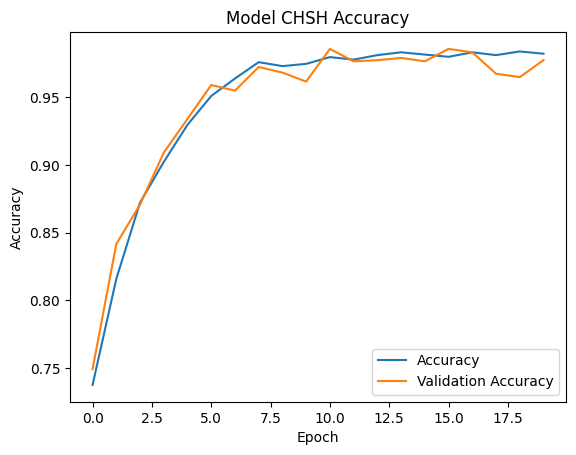

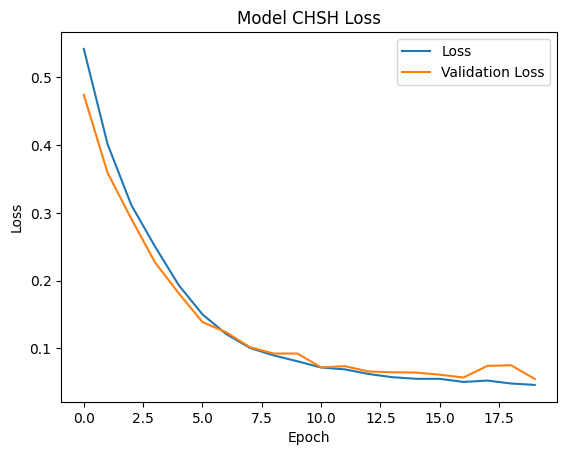

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
